In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

In [3]:
list = [58379,54766,46896,43449,40903,36675,18671,62273,62472,55365,54519,54328,48465,23765,72883,66589,55437,49418,50589,46011,23091,72873,70324,59089,53698,52788,47028,22327,71476,67415]

In [4]:
day_weights_list = []
MAX_RECORD = 1541962

for i in list:
    day_weight = (i*100) / MAX_RECORD
    day_weights_list.append(day_weight)

In [5]:
len(day_weights_list)

30

In [6]:
treatment_range = ['완치자','격리자','중환자','사망자']
age_range = ['0~14세','15~64세','65세이상']
day_range = range(1,31)
vaccine_range = ['미접종','1차접종','2차접종','3차접종','4차접종','동절기접종']

treatment_list = []
day_list = []
age_list = []
vaccine_list = []

for i in range(MAX_RECORD):
    treatment_list.append(treatment_range[random.choices(range(0,len(treatment_range)), weights = [0.6,0.25,0.1,0.05])[0]])
    age_list.append(age_range[random.choices(range(0,len(age_range)), weights = [11.5,70.5,18])[0]])    
    vaccine_list.append(vaccine_range[random.choices(range(0,len(vaccine_range)), weights = [12.1,0.8,21.4,50.9,8.7,6.1])[0]])
    day_list.append(day_range[random.choices(range(0,len(day_range)), weights = day_weights_list)[0]])


In [7]:
pd.Series(treatment_list).value_counts()

완치자    925463
격리자    385174
중환자    154111
사망자     77214
dtype: int64

In [8]:
pd.Series(age_list).value_counts()

15~64세    1086827
65세이상      277206
0~14세      177929
dtype: int64

In [9]:
pd.Series(day_list).value_counts().sum()

1541962

In [10]:
day_list2 = []
for i in day_list:
    a = str(i) + '일'
    day_list2.append(a)

In [11]:
day_list2

['24일',
 '9일',
 '13일',
 '27일',
 '27일',
 '9일',
 '16일',
 '10일',
 '24일',
 '10일',
 '29일',
 '8일',
 '28일',
 '16일',
 '16일',
 '29일',
 '26일',
 '22일',
 '15일',
 '18일',
 '7일',
 '20일',
 '22일',
 '17일',
 '18일',
 '22일',
 '15일',
 '15일',
 '27일',
 '27일',
 '23일',
 '6일',
 '1일',
 '30일',
 '29일',
 '22일',
 '2일',
 '20일',
 '18일',
 '13일',
 '19일',
 '8일',
 '21일',
 '11일',
 '13일',
 '24일',
 '1일',
 '24일',
 '9일',
 '5일',
 '19일',
 '8일',
 '22일',
 '15일',
 '17일',
 '10일',
 '23일',
 '29일',
 '22일',
 '18일',
 '20일',
 '30일',
 '23일',
 '16일',
 '1일',
 '6일',
 '4일',
 '27일',
 '10일',
 '9일',
 '30일',
 '3일',
 '4일',
 '12일',
 '21일',
 '22일',
 '26일',
 '12일',
 '27일',
 '2일',
 '13일',
 '29일',
 '3일',
 '20일',
 '11일',
 '25일',
 '15일',
 '22일',
 '24일',
 '24일',
 '27일',
 '29일',
 '20일',
 '28일',
 '30일',
 '11일',
 '20일',
 '24일',
 '29일',
 '8일',
 '30일',
 '29일',
 '15일',
 '29일',
 '21일',
 '2일',
 '15일',
 '7일',
 '19일',
 '19일',
 '8일',
 '24일',
 '9일',
 '4일',
 '17일',
 '25일',
 '29일',
 '4일',
 '18일',
 '30일',
 '1일',
 '27일',
 '2일',
 '23일',
 '19일',
 '16일',
 '4일',
 '29일',
 '1일',

In [12]:
df = pd.DataFrame(treatment_list)
df.memory_usage(deep=True)

Index          128
0        135692656
dtype: int64

In [13]:
November_dataframe = pd.DataFrame(
    {
        '치료과정': treatment_list,
        '나이' : age_list,
        '백신접종' : vaccine_list,
        '확진일' : day_list2
    })

In [14]:
November_dataframe.head()

,치료과정,나이,백신접종,확진일
0,완치자,15~64세,3차접종,24일
1,완치자,65세이상,2차접종,9일
2,완치자,0~14세,2차접종,13일
3,완치자,0~14세,동절기접종,27일
4,완치자,15~64세,미접종,27일


In [15]:
November_dataframe.shape

(1541962, 4)

In [16]:
November_dataframe.memory_usage(deep=True)

Index          128
치료과정     135692656
나이       144034158
백신접종     138592096
확진일      134846254
dtype: int64

In [17]:
November_dataframe.isnull().sum()

치료과정    0
나이      0
백신접종    0
확진일     0
dtype: int64

In [18]:
November_dataframe['치료과정'].value_counts()

완치자    925463
격리자    385174
중환자    154111
사망자     77214
Name: 치료과정, dtype: int64

In [19]:
November_dataframe['나이'].value_counts()

15~64세    1086827
65세이상      277206
0~14세      177929
Name: 나이, dtype: int64

In [20]:
November_dataframe['백신접종'].value_counts()

3차접종     785223
2차접종     329048
미접종      186601
4차접종     134197
동절기접종     94359
1차접종      12534
Name: 백신접종, dtype: int64

In [21]:
November_dataframe['확진일'].value_counts().index

Index(['22일', '15일', '29일', '23일', '30일', '16일', '9일', '8일', '24일', '1일',
       '10일', '17일', '11일', '2일', '12일', '25일', '26일', '19일', '18일', '13일',
       '27일', '3일', '20일', '4일', '5일', '6일', '14일', '21일', '28일', '7일'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

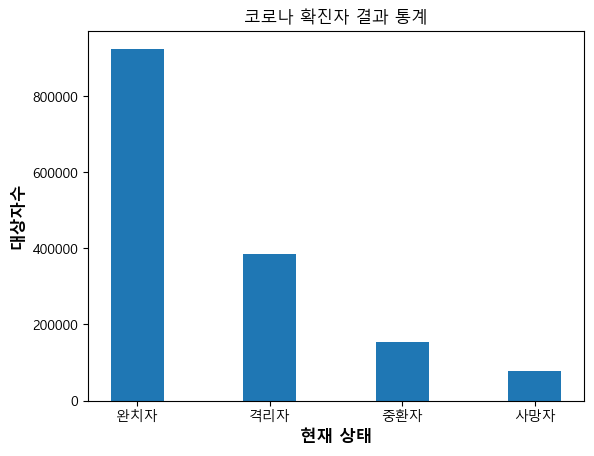

In [34]:
index_day = np.arange(len(November_dataframe['치료과정'].value_counts().index))
font1 = {'size' : 12, 'weight' : 'bold'}
font2 = {'size' : 8}
plt.bar(index_day, November_dataframe['치료과정'].value_counts().values, width = 0.4,)
plt.xticks(index_day,November_dataframe['치료과정'].value_counts().index)

plt.xlabel('현재 상태', fontdict = font1)
plt.ylabel('대상자수', fontdict = font1)
plt.title('코로나 확진자 결과 통계')
plt.show

In [35]:
November_dataframe

,치료과정,나이,백신접종,확진일
0,완치자,15~64세,3차접종,24일
1,완치자,65세이상,2차접종,9일
2,완치자,0~14세,2차접종,13일
3,완치자,0~14세,동절기접종,27일
4,완치자,15~64세,미접종,27일
...,...,...,...,...
1541957,완치자,15~64세,동절기접종,8일
1541958,완치자,15~64세,2차접종,18일
1541959,격리자,15~64세,2차접종,1일
1541960,완치자,15~64세,3차접종,26일


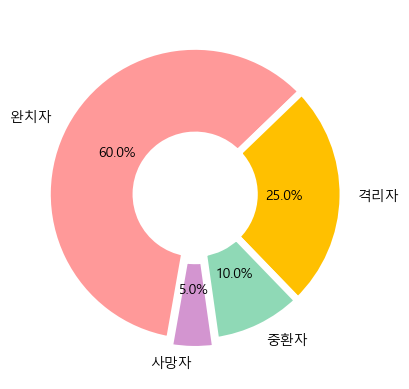

In [40]:
ratio = November_dataframe['치료과정'].value_counts().values
labels = ['완치자','격리자','중환자','사망자']
explode = [0,0,0,0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops,
        explode = explode)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

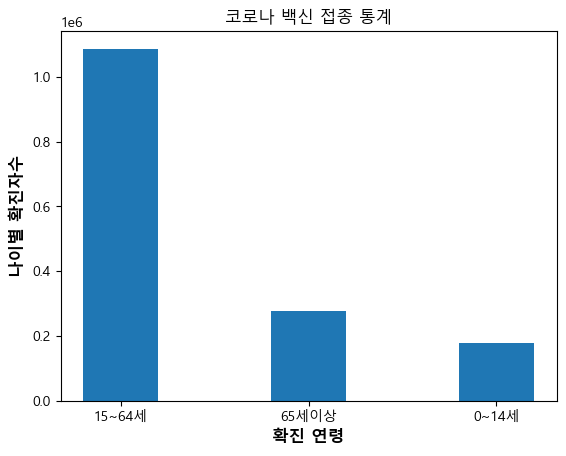

In [24]:
index_day = np.arange(len(November_dataframe['나이'].value_counts().index()
font1 = {'size' : 12, 'weight' : 'bold'}
font2 = {'size' : 8}
plt.bar(index_day, November_dataframe['나이'].value_counts().values, width = 0.4,)
plt.xticks(index_day,November_dataframe['나이'].value_counts().index)

plt.xlabel('확진 연령', fontdict = font1)
plt.ylabel('나이별 확진자수', fontdict = font1)
plt.title('코로나 백신 접종 통계')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

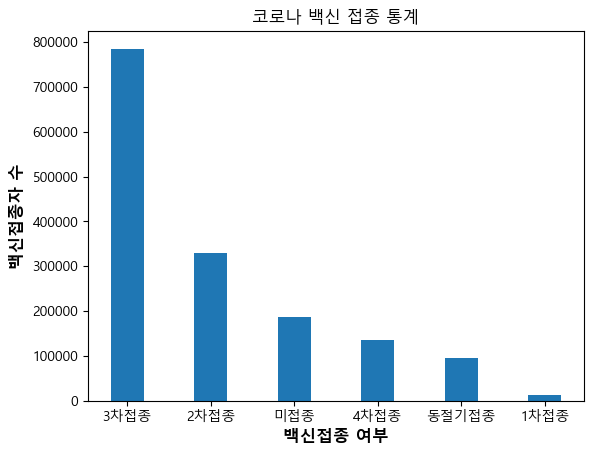

In [25]:
index_day = np.arange(len(November_dataframe['백신접종'].value_counts().index))
font1 = {'size' : 12, 'weight' : 'bold'}
font2 = {'size' : 10}
plt.bar(index_day, November_dataframe['백신접종'].value_counts().values, width = 0.4,)
plt.xticks(index_day,November_dataframe['백신접종'].value_counts().index, fontdict = font2)

plt.xlabel('백신접종 여부', fontdict = font1)
plt.ylabel('백신접종자 수', fontdict = font1)
plt.title('코로나 백신 접종 통계')
plt.show

In [26]:
November_dataframe.head()

,치료과정,나이,백신접종,확진일
0,완치자,15~64세,3차접종,24일
1,완치자,65세이상,2차접종,9일
2,완치자,0~14세,2차접종,13일
3,완치자,0~14세,동절기접종,27일
4,완치자,15~64세,미접종,27일


<function matplotlib.pyplot.show(close=None, block=None)>

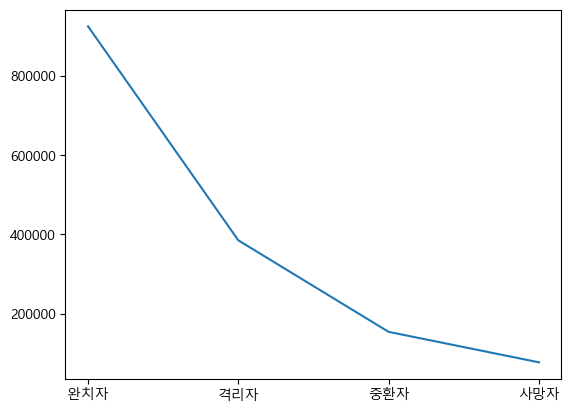

In [27]:
plt.plot(November_dataframe['치료과정'].value_counts())

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

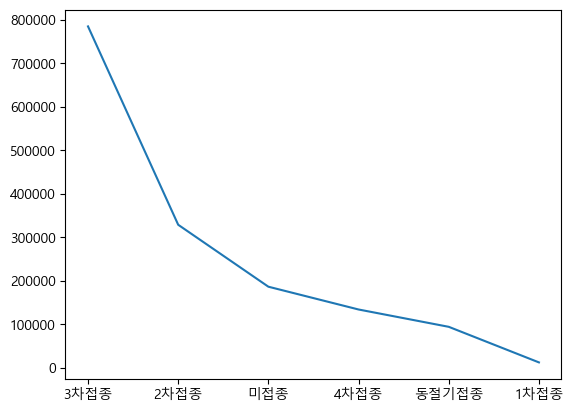

In [28]:
plt.plot(November_dataframe['백신접종'].value_counts())
plt.show

In [29]:
#day_c = November_dataframe['확진일'].value_counts()
#day_c.sort_values

In [30]:
#font3 = {'size' : 8}
#plt.plot(November_dataframe['확진일'].value_counts())

#plt.show